<a href="https://colab.research.google.com/github/andrewdarmawant/ML/blob/main/LHD_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
plt.style.use('fivethirtyeight')

In [20]:
# Get Some Data
df = web.DataReader('AAPL', data_source='yahoo', start ='2010-01-01', end='2021-03-03')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998
2021-02-26,124.849998,121.199997,122.589996,121.260002,164320000.0,121.260002
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001


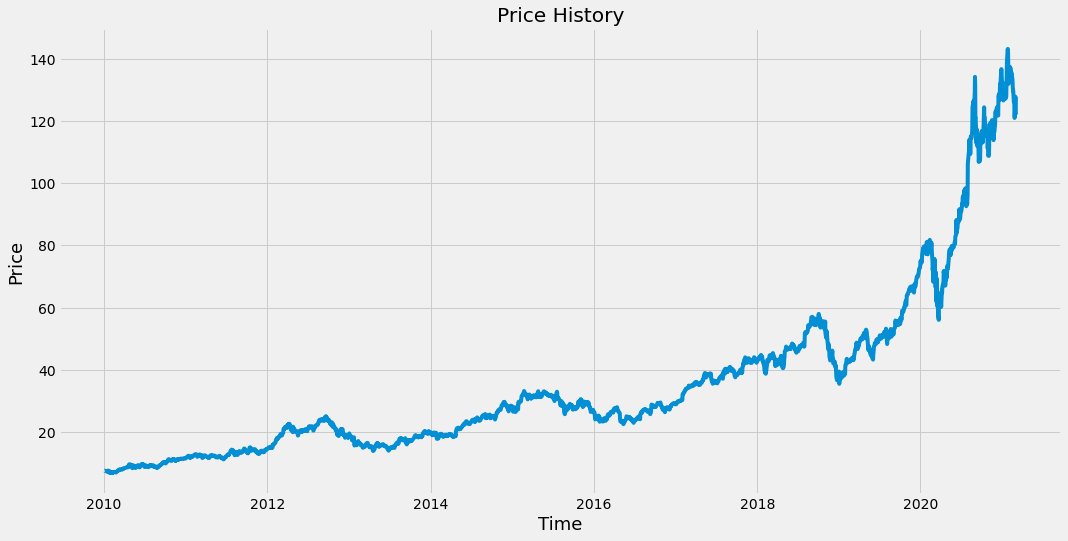

In [21]:
# plot some stuff
plt.figure(figsize=(16,8))
plt.title("Price History")
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [22]:
# Filter to just close column
data = df.filter(['Close'])
#Convert data to numpy array
dataset = data.values
training_len = math.ceil(len(dataset) * 0.8)

#Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00575406],
       [0.00585102],
       [0.00495751],
       ...,
       [0.88723491],
       [0.86764594],
       [0.8451956 ]])

In [23]:
#Create Training Data
train_data = scaled_data[0:training_len, :]

x_train = []
y_train = []

for i in range(60, training_len):
  x_train.append(train_data[i-60: i, 0]) #Get the data in the past 60 days for each iteration
  y_train.append(train_data[i, 0]) #get the data of that day

  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([5.75406373e-03, 5.85101519e-03, 4.95751056e-03, 4.85531498e-03,
       5.22215135e-03, 4.73217092e-03, 4.10592389e-03, 4.87365715e-03,
       4.55398986e-03, 3.63690244e-03, 6.02394863e-03, 5.15665060e-03,
       4.19763123e-03, 1.49353806e-03, 2.88751135e-03, 3.63952275e-03,
       4.14785234e-03, 1.89705527e-03, 2.61681132e-06, 7.02222017e-04,
       9.98310019e-04, 1.88133341e-03, 0.00000000e+00, 8.93497630e-04,
       5.42386622e-04, 1.08478024e-03, 8.04410598e-04, 1.73459956e-03,
       2.18266553e-03, 2.97398157e-03, 2.75126224e-03, 2.85082702e-03,
       2.52067499e-03, 2.19314327e-03, 1.31274019e-03, 2.25603420e-03,
       2.60714521e-03, 3.29364886e-03, 4.43870323e-03, 4.40201889e-03,
       4.52778326e-03, 4.88937901e-03, 7.04846874e-03, 7.08253277e-03,
       8.11491031e-03, 8.59179269e-03, 8.76472614e-03, 9.05296021e-03,
       8.32977221e-03, 8.48960411e-03, 8.40313739e-03, 8.54201030e-03,
       7.91314996e-03, 8.56821340e-03, 9.51412072e-03, 9.77876851e-03,
     

In [30]:
#Convert Numpy
x_train, y_train = np.array(x_train), np.array(y_train)


#Reshape out Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


#Build our LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))

#Density Connected NN
model.add(Dense(30))
model.add(Dense(1))


In [33]:
#Compile our Model
model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs=10)

Epoch 1/10
2188/2188 [==============================] - 54s 23ms/step - loss: 3.4255e-05
Epoch 2/10
2188/2188 [==============================] - 49s 22ms/step - loss: 2.5420e-05
Epoch 3/10
2188/2188 [==============================] - 48s 22ms/step - loss: 2.9642e-05
Epoch 4/10
2188/2188 [==============================] - 48s 22ms/step - loss: 3.1015e-05
Epoch 5/10
2188/2188 [==============================] - 48s 22ms/step - loss: 2.8772e-05
Epoch 6/10
2188/2188 [==============================] - 49s 22ms/step - loss: 2.4317e-05
Epoch 7/10
2188/2188 [==============================] - 49s 22ms/step - loss: 2.6651e-05
Epoch 8/10
2188/2188 [==============================] - 49s 23ms/step - loss: 3.0699e-05
Epoch 9/10
2188/2188 [==============================] - 51s 23ms/step - loss: 2.4974e-05
Epoch 10/10
2188/2188 [==============================] - 49s 22ms/step - loss: 2.7135e-05


In [36]:
test_data = scaled_data[training_len-60:, : ]

x_test = []
y_test = dataset[training_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, :])

#Reshape and covert to numpy
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get Predictions
pred = model.predict(x_test)
print(pred)
pred = scaler.inverse_transform(pred)
print(pred)


[[0.27127704]
 [0.25868857]
 [0.2620159 ]
 [0.25906274]
 [0.2603004 ]
 [0.2637965 ]
 [0.25285223]
 [0.25150296]
 [0.25557914]
 [0.24474314]
 [0.23822369]
 [0.2268148 ]
 [0.22021362]
 [0.24086161]
 [0.23614213]
 [0.23747583]
 [0.24047078]
 [0.24044658]
 [0.20961744]
 [0.22488348]
 [0.22144024]
 [0.22732568]
 [0.23171447]
 [0.23241167]
 [0.22958584]
 [0.22546153]
 [0.23178178]
 [0.23439515]
 [0.23587893]
 [0.23765273]
 [0.23059058]
 [0.23268433]
 [0.2298156 ]
 [0.240028  ]
 [0.23586145]
 [0.23350693]
 [0.25458163]
 [0.2541651 ]
 [0.25490242]
 [0.2642478 ]
 [0.26870278]
 [0.26836145]
 [0.26212   ]
 [0.2619034 ]
 [0.2597592 ]
 [0.26276854]
 [0.26097202]
 [0.26264137]
 [0.26184958]
 [0.26315507]
 [0.26524615]
 [0.26319832]
 [0.26732475]
 [0.26921752]
 [0.2692655 ]
 [0.27041078]
 [0.2669285 ]
 [0.2709459 ]
 [0.27198008]
 [0.27128017]
 [0.26949874]
 [0.26583385]
 [0.26706508]
 [0.27842122]
 [0.28078574]
 [0.28244495]
 [0.28643823]
 [0.29063177]
 [0.29380655]
 [0.29058066]
 [0.29430744]
 [0.30

In [38]:
#See total error from prediction

rmse = np.sqrt( np.mean(pred - y_test)**2)
rmse

4.242578811917016

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


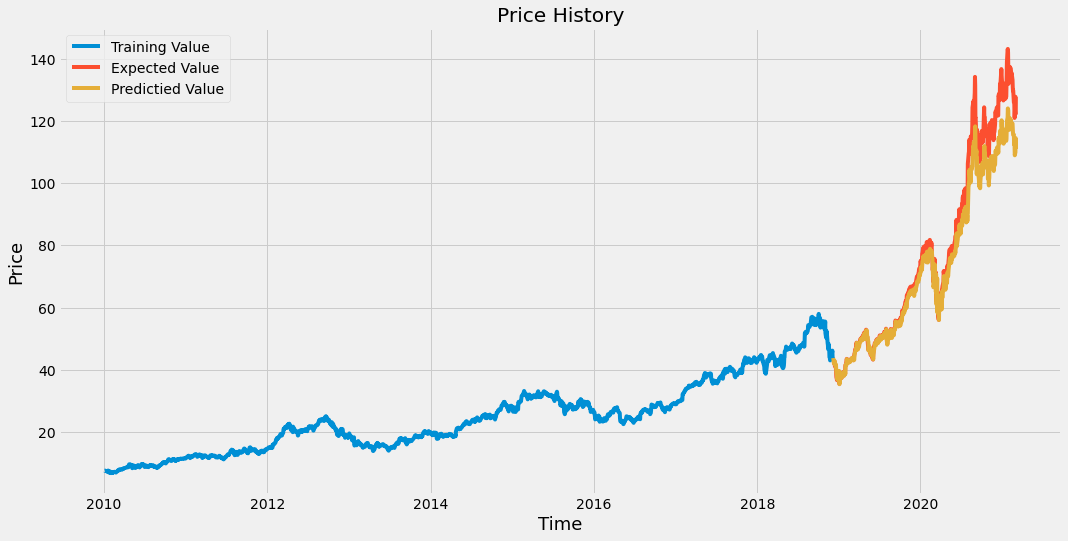

In [41]:
# Set up a plot data
train = data[:training_len]
expected = data[training_len:]
expected['Predictions'] = pred

#Visualize output
plt.figure(figsize=(16,8))
plt.title("Price History")
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.plot(train['Close'])
plt.plot(expected[['Close', 'Predictions']])
plt.legend(["Training Value", "Expected Value", "Predictied Value"])
plt.show()
